In [135]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
import seaborn as sns
data= pd.read_csv(r"./dataset/Iris.csv") 
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


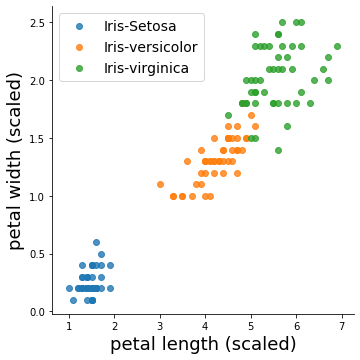

In [136]:
sns.lmplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-versicolor', 'Iris-virginica'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [137]:
a = data[data['Species'] == 'Iris-versicolor'].index
data = data.drop(a)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [138]:
species_mapping = {"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor":2}
data['Species'] = data['Species'].map(species_mapping)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [139]:
X = data.iloc[:, [3, 4]].values
Y = data['Species'].values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X

array([[-1.01164677, -1.02231593],
       [-1.01164677, -1.02231593],
       [-1.0596376 , -1.02231593],
       [-0.96365593, -1.02231593],
       [-1.01164677, -1.02231593],
       [-0.86767427, -0.80363873],
       [-1.01164677, -0.91297733],
       [-0.96365593, -1.02231593],
       [-1.01164677, -1.02231593],
       [-0.96365593, -1.13165453],
       [-0.96365593, -1.02231593],
       [-0.9156651 , -1.02231593],
       [-1.01164677, -1.13165453],
       [-1.15561927, -1.13165453],
       [-1.10762843, -1.02231593],
       [-0.96365593, -0.80363873],
       [-1.0596376 , -0.80363873],
       [-1.01164677, -0.91297733],
       [-0.86767427, -0.91297733],
       [-0.96365593, -0.91297733],
       [-0.86767427, -1.02231593],
       [-0.96365593, -0.80363873],
       [-1.2036101 , -1.02231593],
       [-0.86767427, -0.69430012],
       [-0.7716926 , -1.02231593],
       [-0.9156651 , -1.02231593],
       [-0.9156651 , -0.80363873],
       [-0.96365593, -1.02231593],
       [-1.01164677,

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [142]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(max_iter=10000000,C=1,loss="hinge")  # max_iter: default=1000
svc_model.fit(X_train, Y_train)
y_pred = svc_model.predict(X_test)
print("train 정확도:" ,svc_model.score(X_train, Y_train)*100 )

train 정확도: 100.0


In [143]:
from sklearn.svm import SVC
svc_model = LinearSVC(max_iter=10000000,C=1,loss="hinge")
svc_model.fit(X_test, Y_test)
print("test 정확도:" ,svc_model.score(X_test, Y_test)*100 )

test 정확도: 100.0


In [144]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(max_iter=10000000,C=100,loss="hinge")
svc_model.fit(X_train, Y_train)
y_pred = svc_model.predict(X_test)
print("train 정확도:" ,svc_model.score(X_train, Y_train)*100 )

train 정확도: 100.0


In [145]:
from sklearn.svm import SVC
svc_model = LinearSVC(max_iter=10000000,C=100,loss="hinge")
svc_model.fit(X_test, Y_test)
print("test 정확도:" ,svc_model.score(X_test, Y_test)*100 )

test 정확도: 100.0


In [146]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(max_iter=10000000,C=1000,loss="hinge")
svc_model.fit(X_train, Y_train)
y_pred = svc_model.predict(X_test)
print("train 정확도:" ,svc_model.score(X_train, Y_train)*100 )

train 정확도: 100.0


In [147]:
from sklearn.svm import SVC
svc_model = LinearSVC(max_iter=10000000,C=1000,loss="hinge")
svc_model.fit(X_test, Y_test)
print("test 정확도:" ,svc_model.score(X_test, Y_test)*100 )

test 정확도: 100.0


In [148]:
print(svc_model.predict([[0,2]]))

[1]


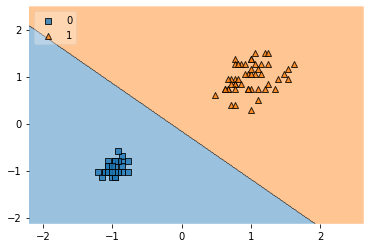

In [149]:
plot_decision_regions(X=X,y=Y, clf=svc_model, legend=2)

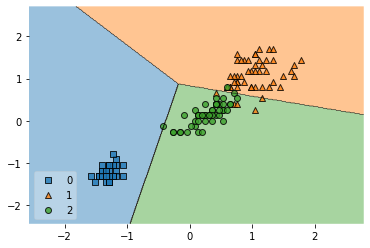

In [134]:
plot_decision_regions(X=X,y=Y, clf=svc_model, legend=3)